In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from utils_data_analysis import plot_plate_view
import pandas as pd
from pathlib import Path

In [2]:
df = pd.read_csv("./results_per_label_Plate01.csv", index_col=0)

In [3]:
df

,plate,well_id,filepath,ObjectNumber,Mtb_infected,Intensity_MeanIntensity_Cytoplasm_LC3B_ch0,Intensity_MaxIntensity_Cytoplasm_LC3B_ch0,Intensity_MinIntensity_Cytoplasm_LC3B_ch0,Intensity_StdIntensity_Cytoplasm_LC3B_ch0,Intensity_MeanIntensity_Cytoplasm_GAL3_ch1,...,Intensity_StdIntensity_Cytoplasm_GAL3_ch1,Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2,Intensity_MaxIntensity_Cytoplasm_Chmp4B_ch2,Intensity_MinIntensity_Cytoplasm_Chmp4B_ch2,Intensity_StdIntensity_Cytoplasm_Chmp4B_ch2,Intensity_MeanIntensity_Cytoplasm_Mtb_ch3,Intensity_MaxIntensity_Cytoplasm_Mtb_ch3,Intensity_MinIntensity_Cytoplasm_Mtb_ch3,Intensity_StdIntensity_Cytoplasm_Mtb_ch3,GAL3_num_points
0,Plate01,A10,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,1,False,210.937611,1217.0,101.0,161.467947,136.377897,...,15.020834,125.128342,163.0,90.0,12.012973,119.543672,151.0,81.0,11.350923,0
1,Plate01,A10,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2,False,246.186851,840.0,100.0,102.238330,1107.662630,...,714.176703,170.833910,285.0,83.0,36.066141,123.623702,169.0,78.0,12.301690,0
2,Plate01,A10,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,3,True,143.581451,209.0,100.0,19.309011,146.777646,...,23.306861,127.192628,172.0,83.0,12.734684,122.931034,281.0,89.0,15.670887,0
3,Plate01,A10,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,4,True,294.861290,720.0,109.0,118.727732,459.941935,...,253.212966,147.659677,209.0,89.0,20.652470,127.351613,275.0,80.0,18.899708,0
4,Plate01,A10,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,5,False,266.696767,1056.0,101.0,150.757646,835.050167,...,550.528981,154.055741,236.0,95.0,26.363322,123.382386,165.0,86.0,12.187583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202299,Plate01,H9,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2187,True,279.480501,788.0,109.0,115.898376,734.642061,...,531.322839,162.440111,298.0,90.0,31.161251,148.976323,440.0,75.0,48.744239,2
202300,Plate01,H9,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2188,True,762.092961,2144.0,143.0,447.035894,197.472776,...,132.091148,146.318725,216.0,94.0,21.163862,123.533865,188.0,89.0,13.445448,0
202301,Plate01,H9,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2189,False,225.864494,444.0,103.0,83.942869,345.138937,...,178.884056,143.701544,232.0,92.0,19.337486,124.833619,179.0,90.0,14.105268,0
202302,Plate01,H9,X:\Lisa\siMtb screen I_LØ\Plate 01_Nuc\Plate01...,2190,False,800.718799,3664.0,180.0,503.917190,624.909953,...,203.585599,157.770932,226.0,105.0,19.227736,125.415482,169.0,90.0,12.489220,0


In [9]:
# Remove Mtb mean values above 250 to clip outliers
df = df[df["Intensity_MeanIntensity_Cytoplasm_Mtb_ch3"] <= 250]
df = df[df["Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2"] <= 1100]

# Remove the GAL points above 20 to clip outliers
df = df[df["GAL3_num_points"] <= 20]

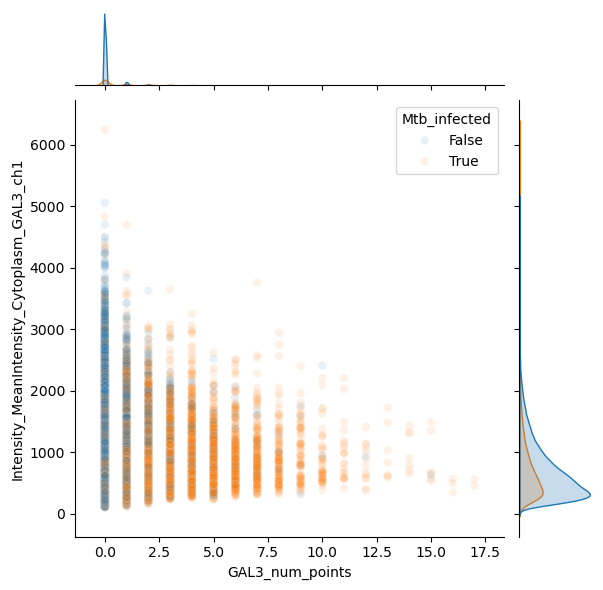

In [10]:
sns.jointplot(
    x="GAL3_num_points",
    y="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.1  # adjust transparency (0=transparent, 1=opaque)
)

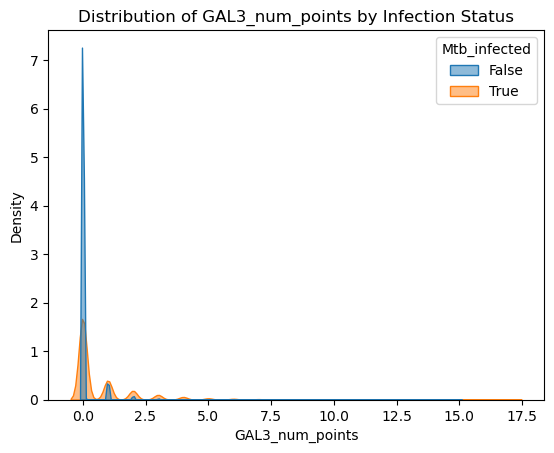

In [15]:
sns.kdeplot(
    data=df,
    x="GAL3_num_points",
    hue="Mtb_infected",
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title("Distribution of GAL3_num_points by Infection Status")
plt.show()


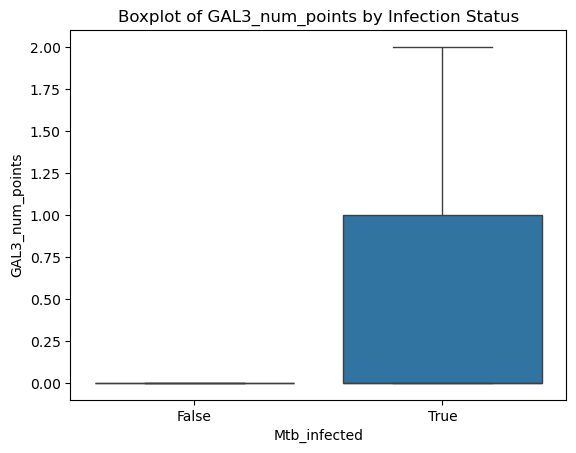

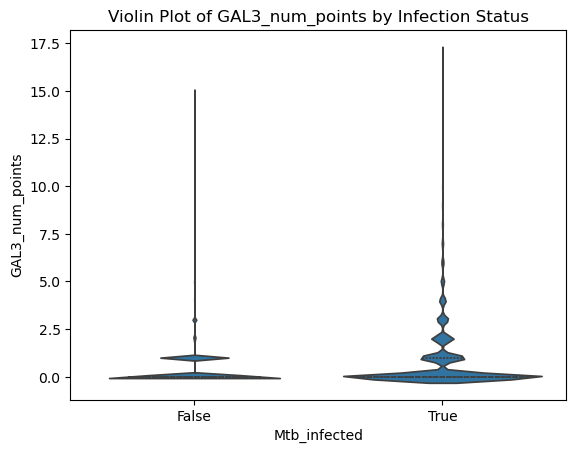

In [16]:
sns.boxplot(
    data=df,
    x="Mtb_infected",
    y="GAL3_num_points",
    showfliers=False  # hide extreme outliers if distribution is heavy-tailed
)
plt.title("Boxplot of GAL3_num_points by Infection Status")
plt.show()

sns.violinplot(
    data=df,
    x="Mtb_infected",
    y="GAL3_num_points",
    inner="quartile"
)
plt.title("Violin Plot of GAL3_num_points by Infection Status")
plt.show()


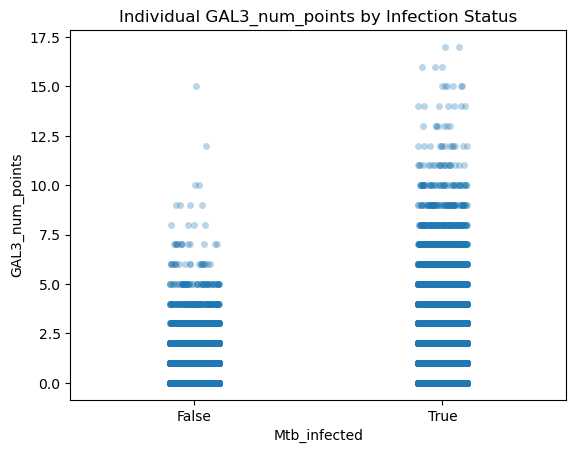

In [17]:
sns.stripplot(
    data=df,
    x="Mtb_infected",
    y="GAL3_num_points",
    alpha=0.3,
    jitter=True
)
plt.title("Individual GAL3_num_points by Infection Status")
plt.show()


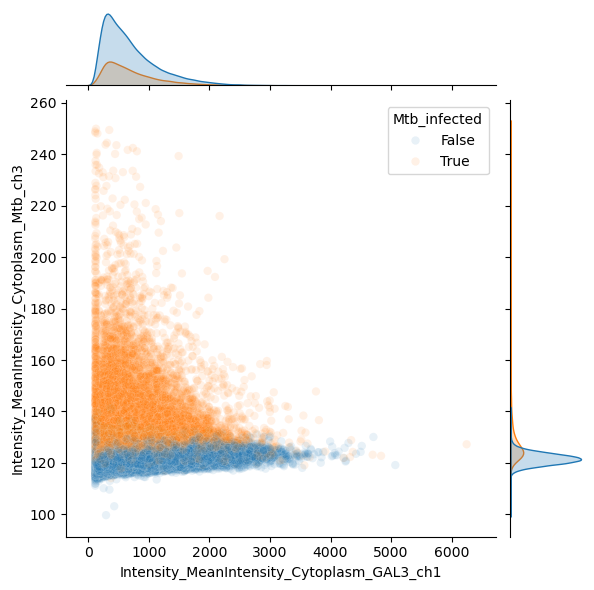

In [12]:
sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    y="Intensity_MeanIntensity_Cytoplasm_Mtb_ch3",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.1  # adjust transparency (0=transparent, 1=opaque)
)

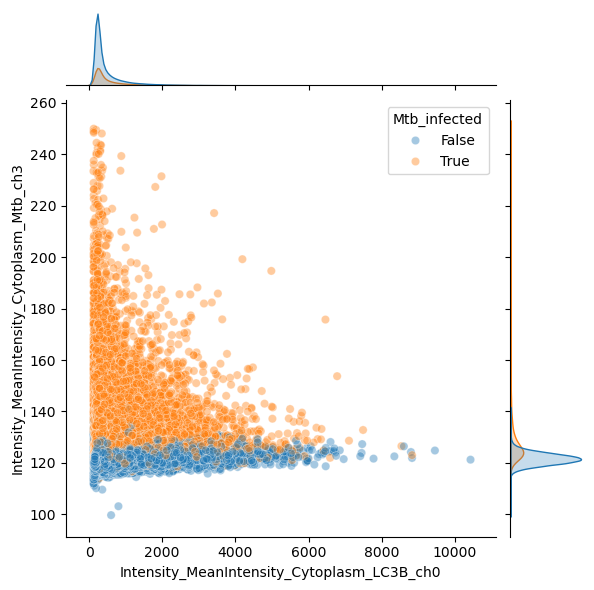

In [13]:
sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_LC3B_ch0",
    y="Intensity_MeanIntensity_Cytoplasm_Mtb_ch3",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.4  # adjust transparency (0=transparent, 1=opaque)
)

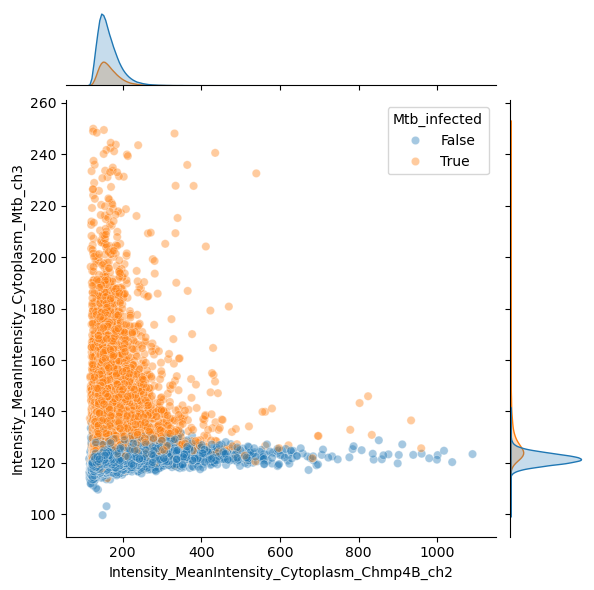

In [14]:
sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2",
    y="Intensity_MeanIntensity_Cytoplasm_Mtb_ch3",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.4  # adjust transparency (0=transparent, 1=opaque)
)

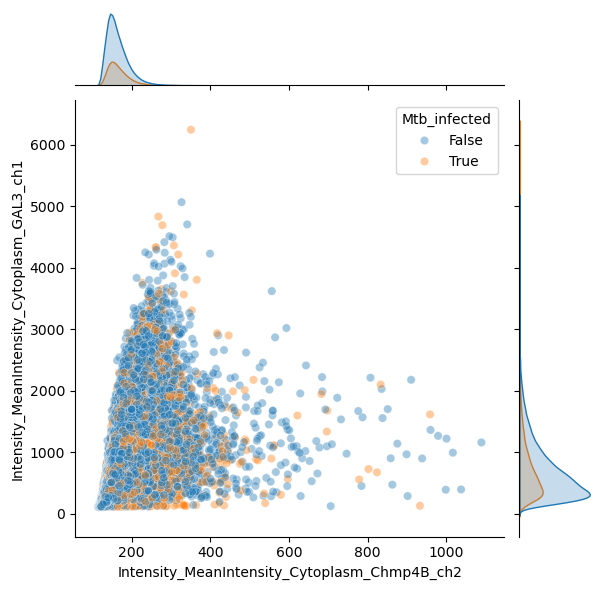

In [18]:
sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2",
    y="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    data=df,
    hue="Mtb_infected",
    kind="scatter",
    alpha= 0.4  # adjust transparency (0=transparent, 1=opaque)
)

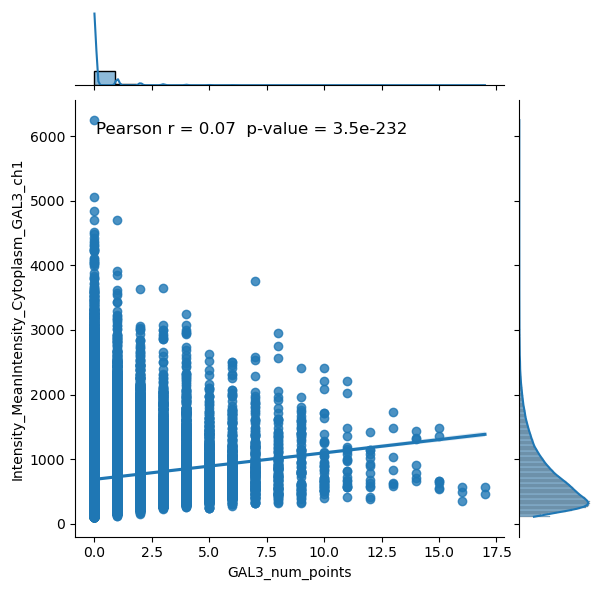

In [11]:
# Calculate Pearson r and p-value
r, p = pearsonr(df['GAL3_num_points'], df['Intensity_MeanIntensity_Cytoplasm_GAL3_ch1'])

sns.jointplot(
    x="GAL3_num_points",
    y="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    data=df,
    kind="reg",
)

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()

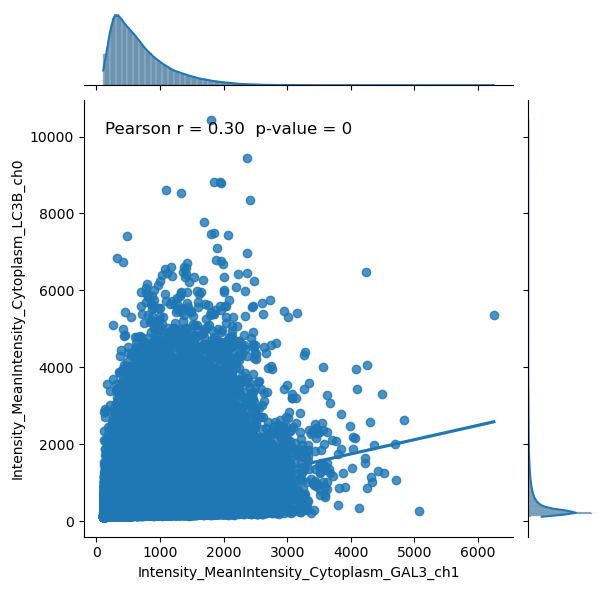

In [15]:
# Calculate Pearson r and p-value
r, p = pearsonr(df['Intensity_MeanIntensity_Cytoplasm_LC3B_ch0'], df['Intensity_MeanIntensity_Cytoplasm_GAL3_ch1'])

sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    y="Intensity_MeanIntensity_Cytoplasm_LC3B_ch0",
    data=df,
    kind="reg",
)

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()

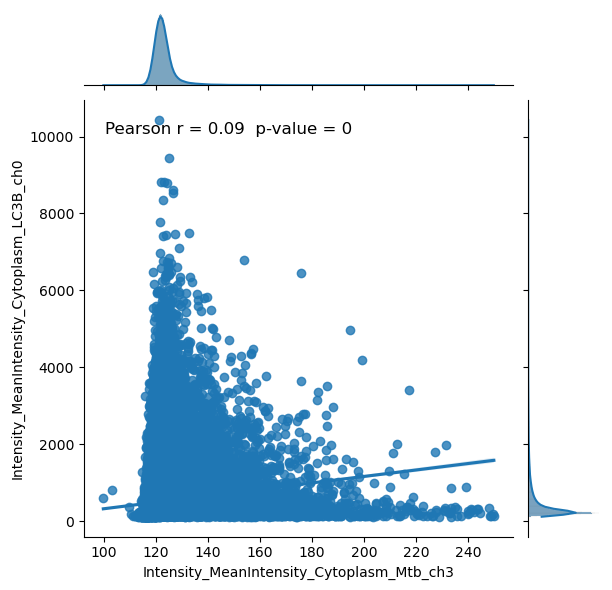

In [16]:
# Calculate Pearson r and p-value
r, p = pearsonr(df['Intensity_MeanIntensity_Cytoplasm_LC3B_ch0'], df['Intensity_MeanIntensity_Cytoplasm_Mtb_ch3'])

sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_Mtb_ch3",
    y="Intensity_MeanIntensity_Cytoplasm_LC3B_ch0",
    data=df,
    kind="reg",
)

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()

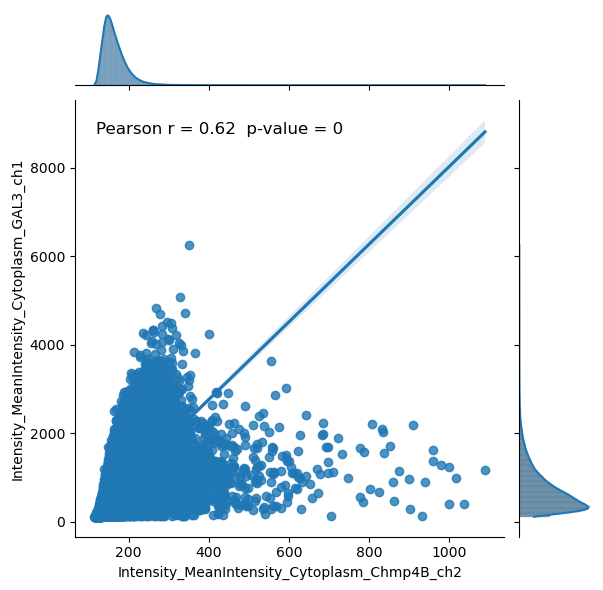

In [17]:
# Calculate Pearson r and p-value
r, p = pearsonr(df['Intensity_MeanIntensity_Cytoplasm_GAL3_ch1'], df['Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2'])

sns.jointplot(
    x="Intensity_MeanIntensity_Cytoplasm_Chmp4B_ch2",
    y="Intensity_MeanIntensity_Cytoplasm_GAL3_ch1",
    data=df,
    kind="reg",
)

# Annotate with Pearson r and p-value
plt.annotate(f'Pearson r = {r:.2f}  p-value = {p:.2g}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             ha='left', va='top', fontsize=12)

plt.show()

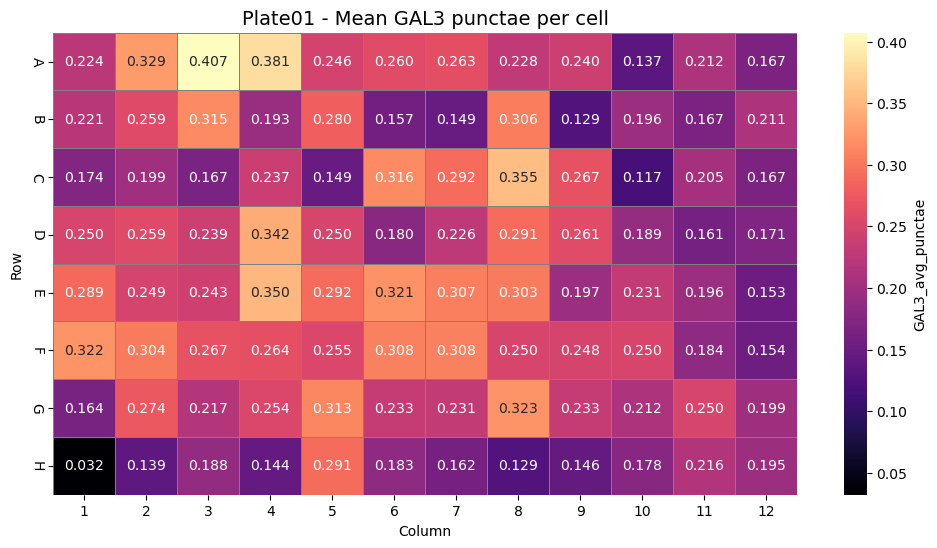

Saved plate view to ./results/plate_view/GAL3_avg_points\Plate01_GAL3_avg_points.png


In [7]:
df = pd.read_csv("./results/results_per_label_Plate01.csv", index_col=0)

result = (
    df.groupby("well_id")
      .agg(
          GAL3_sum=("GAL3_num_points", "sum"),
          ObjectNumber_max=("ObjectNumber", "max")
      )
      .reset_index()
)

# Add ratio column
result["GAL3_avg_points"] = result["GAL3_sum"] / result["ObjectNumber_max"]

plot_plate_view(result, column_name="GAL3_avg_points", plate="Plate01", title="Mean GAL3 punctae per cell", label="GAL3_avg_punctae", cmap="magma")

In [ ]:
# ------ Plotting Mean GAL3 punctae per cell

# Loop thorugh .csv in the results folder
results_path = Path("./results")

csv_list = []

for file_path in results_path.glob(f"*.csv"):
    if "per_label" in str(file_path):
        csv_list.append(str(file_path))

csv_list

for csv_path in csv_list:

    plate_nr = csv_path.split(".")[0].split("_")[-1]

    df = pd.read_csv(csv_path, index_col=0)

    result = (
        df.groupby("well_id")
        .agg(
            GAL3_sum=("GAL3_num_points", "sum"),
            ObjectNumber_max=("ObjectNumber", "max")
        )
        .reset_index()
    )

    # Add ratio column
    result["GAL3_avg_points"] = result["GAL3_sum"] / result["ObjectNumber_max"]

    plot_plate_view(result, column_name="GAL3_avg_points", plate=plate_nr, title="Mean GAL3 punctae per cell", label="GAL3_avg_punctae", display=False, cmap="magma")

Saved plate view to ./results/plate_view/GAL3_avg_points\Plate01_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate02_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate03_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate04_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate05_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate06_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate07_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate08_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate09_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate10_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate11_GAL3_avg_points.png
Saved plate view to ./results/plate_view/GAL3_avg_points\Plate12_

In [17]:
# ------ Plotting %Mtb_infected_cells per well
# Loop thorugh .csv in the results folder
results_path = Path("./results")

csv_list = []

for file_path in results_path.glob(f"*.csv"):
    if "infection" in str(file_path):
        csv_list.append(str(file_path))

csv_list

for csv_path in csv_list:

    plate_nr = csv_path.split(".")[0].split("_")[-1]

    df = pd.read_csv(csv_path, index_col=0)

    plot_plate_view(df, column_name="%_inf_cells", plate=plate_nr, title="Percentage of Mtb infected cells per well", label="%_Mtb_inf_cells", display=False, cmap="magma")


Saved plate view to ./results/plate_view/%_inf_cells\Plate01_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate02_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate03_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate04_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate05_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate06_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate07_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate08_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate09_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate10_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate11_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate12_%_inf_cells.png
Saved plate view to ./results/plate_view/%_inf_cells\Plate13_%_inf_cells.png

In [2]:
# ------ Plotting %Mtb_infected_cells per well
# Loop thorugh .csv in the results folder
results_path = Path("./results")

csv_list = []

for file_path in results_path.glob(f"*.csv"):
    if "infection" in str(file_path):
        csv_list.append(str(file_path))

csv_list

for csv_path in csv_list:

    plate_nr = csv_path.split(".")[0].split("_")[-1]

    df = pd.read_csv(csv_path, index_col=0)

    plot_plate_view(df, column_name="total_nr_cells", plate=plate_nr, title="Cell number per well", label="cell_number", display=False, cmap="magma")

Saved plate view to ./results/plate_view/total_nr_cells\Plate01_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate02_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate03_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate04_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate05_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate06_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate07_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate08_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate09_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate10_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate11_total_nr_cells.png
Saved plate view to ./results/plate_view/total_nr_cells\Plate12_total_nr_cells.png
Save